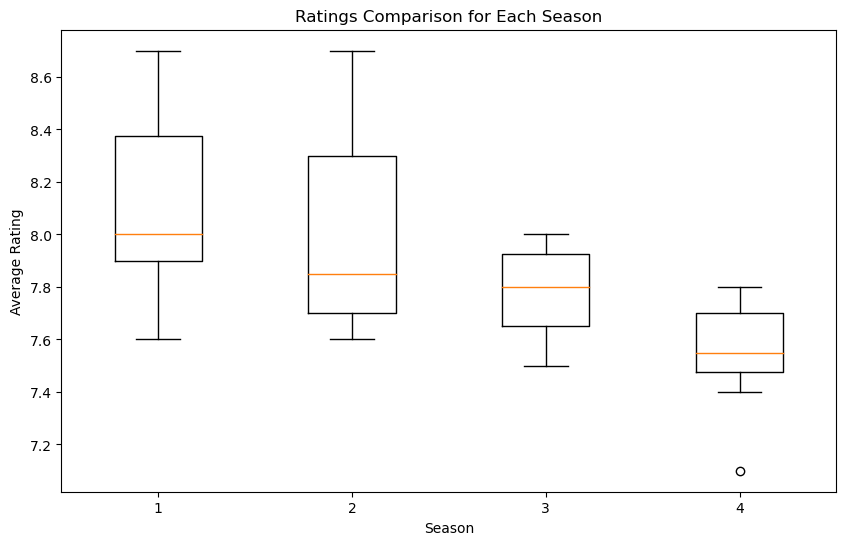

Season 1
Episode: Trompe L'Oeil
Episode: The Well-Tempered Clavier
Episode: The Bicameral Mind

Season 2
Episode: Kiksuya
Episode: Vanishing Point
Episode: The Passenger

Episode names aired before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [2]:
import requests
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Function to extract the desired attributes from the episodes data
def extract_attributes(episode):
    id = episode['id']
    url = episode['url']
    name = episode['name']
    season = episode['season']
    number = episode['number']
    type = episode['type']
    airdate = episode['airdate']
    airtime = episode['airtime']
    runtime = episode['runtime']
    rating = episode['rating']['average']
    summary = BeautifulSoup(episode['summary'], 'html.parser').get_text()
    medium_image = episode['image']['medium']
    original_image = episode['image']['original']

    # Return the extracted attributes as a dictionary
    return {
        'id': id,
        'url': url,
        'name': name,
        'season': season,
        'number': number,
        'type': type,
        'airdate': airdate,
        'airtime': airtime,
        'runtime': runtime,
        'average_rating': rating,
        'summary': summary,
        'medium_image': medium_image,
        'original_image': original_image
    }

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API and retrieve the JSON response
response = requests.get(api_link)
data = json.loads(response.text)

# Check if the response contains the 'episodes' key
if 'episodes' in data['_embedded']:
    episodes_data = data['_embedded']['episodes']

    # Extract attributes for each episode
    extracted_data = []
    for episode in episodes_data:
        extracted_data.append(extract_attributes(episode))

    # Analysis 1: Compare ratings for each season
    season_ratings = {}  # Dictionary to store season ratings
    for episode_data in extracted_data:
        season = episode_data['season']
        rating = episode_data['average_rating']
        if season not in season_ratings:
            season_ratings[season] = []
        season_ratings[season].append(rating)

    # Plotting season ratings
    seasons = sorted(season_ratings.keys())
    ratings = [season_ratings[season] for season in seasons]
    plt.figure(figsize=(10, 6))
    plt.boxplot(ratings, labels=seasons)
    plt.title("Ratings Comparison for Each Season")
    plt.xlabel("Season")
    plt.ylabel("Average Rating")
    plt.show()

    # Analysis 2: Episode names with average rating > 8 for each season
    high_rated_episodes = {}  # Dictionary to store high rated episodes
    for episode_data in extracted_data:
        season = episode_data['season']
        rating = episode_data['average_rating']
        if rating > 8:
            if season not in high_rated_episodes:
                high_rated_episodes[season] = []
            high_rated_episodes[season].append(episode_data['name'])

    # Print episode names with average rating > 8 for each season
    for season, episodes in high_rated_episodes.items():
        print("Season", season)
        for episode in episodes:
            print("Episode:", episode)
        print()

    # Analysis 3: Episode names that aired before May 2019
    episodes_before_2019 = []
    for episode_data in extracted_data:
        airdate = episode_data['airdate']
        if airdate < '2019-05-01':
            episodes_before_2019.append(episode_data['name'])

    # Print episode names that aired before May 2019
    print("Episode names aired before May 2019:")
    for episode in episodes_before_2019:
        print(episode)
